<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-6/blob/main/PruebaModeloLaRioja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install semtorch

     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 29.2MB 147kB/s 
     |████████████████████████████████| 204kB 42.0MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
  Created wheel for semtorch: filename=SemTorch-0.1.1-cp37-none-any.whl size=50551 sha256=c60813959bf812086bd34e64dfedcd4da9d078fa7f5340a13f14703199bef138
  Stored in directory: /root/.cache/pip/wheels/f6/da/9f/726f9d2f054d71afa59afeca3f4672464001e9e3f2924d959e
Successfully built semtorch
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
!pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.7/dist-packages (2.3.1)


In [3]:
from fastai.basics import *
from fastai.vision import models
from fastai.vision.all import *
from fastai.metrics import *
from fastai.data.all import *
from fastai.callback import *


from pathlib import Path
import random
from semtorch import get_segmentation_learner

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [16]:
!wget https://www.dropbox.com/s/lsfdcp4vpz7s8u8/dataset_prueba.zip?dl=0 -O dataset.zip

--2021-05-25 14:30:48--  https://www.dropbox.com/s/lsfdcp4vpz7s8u8/dataset_prueba.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lsfdcp4vpz7s8u8/dataset_prueba.zip [following]
--2021-05-25 14:30:48--  https://www.dropbox.com/s/raw/lsfdcp4vpz7s8u8/dataset_prueba.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd3fde97217cc754eb68c45adb5.dl.dropboxusercontent.com/cd/0/inline/BPKLMERryLvJPRceLv7RR3WfQ5-VDM4HnQOs6C0wHoHi742e3QcAglTCi_y6qVDNN_COxnNaVwYj8HJSF0PwXdVxvkA9UAVhh3462_egL-lj4g2inyrdgpDIXVNI7vkwQ46UUyd8UbZaitb1sA-m50_P/file# [following]
--2021-05-25 14:30:49--  https://ucd3fde97217cc754eb68c45adb5.dl.dropboxusercontent.com/cd/0/inline/BPKLMERryLvJPRceLv7RR3WfQ5-VDM4HnQOs6C0wHoHi742e3QcAglTCi_y6qVDN

In [17]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset_prueba/
  inflating: dataset_prueba/codes.txt  
   creating: dataset_prueba/Images/
   creating: dataset_prueba/Images/test/
  inflating: dataset_prueba/Images/test/22828930_15.tiff  
  inflating: dataset_prueba/Images/test/22828990_15.tiff  
  inflating: dataset_prueba/Images/test/22829050_15.tiff  
   creating: dataset_prueba/Images/train/
  inflating: dataset_prueba/Images/train/22678915_15.tiff  
  inflating: dataset_prueba/Images/train/22678930_15.tiff  
  inflating: dataset_prueba/Images/train/22678945_15.tiff  
  inflating: dataset_prueba/Images/train/22678960_15.tiff  
  inflating: dataset_prueba/Images/train/22678975_15.tiff  
  inflating: dataset_prueba/Images/train/22678990_15.tiff  
  inflating: dataset_prueba/Images/train/22679005_15.tiff  
  inflating: dataset_prueba/Images/train/22679020_15.tiff  
   creating: dataset_prueba/Images/val/
  inflating: dataset_prueba/Images/val/22978945_15.tiff  
  inflating: dataset_prueba/Images/

In [18]:
path=Path('dataset_prueba/')

In [19]:
path.ls()

(#3) [Path('dataset_prueba/Labels'),Path('dataset_prueba/codes.txt'),Path('dataset_prueba/Images')]

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
import os

def recortar_en_trozos(imagen_ruta, altoyancho):
  imagen = cv2.imread(imagen_ruta)
  nombre = imagen_ruta.split('/')[3]
  carpeta2 = imagen_ruta.split('/')[2]
  carpeta1 = imagen_ruta.split('/')[1]
  extension = nombre.split('.')
  ancho = altoyancho
  alto = altoyancho
  i = 0
  for y in range(0,1500,300):
    for x in range(0,1500,300):
      i = i + 1
      recorte = imagen[y:y+altoyancho, x:x+altoyancho]
      cv2.imwrite('dataset_prueba/'+ carpeta1 + '/' + carpeta2 +'/' + extension[0] + '_' + str(i) + '.'+ extension[1], recorte)
  
  os.remove(imagen_ruta)

In [22]:
tam = 300

In [23]:
recortar_en_trozos('dataset_prueba/Images/test/22828930_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/test/22828990_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/test/22829050_15.tiff', tam)

In [24]:
recortar_en_trozos('dataset_prueba/Images/train/22678915_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22678930_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22678945_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22678960_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22678975_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22678990_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22679005_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22679020_15.tiff', tam)

In [25]:
recortar_en_trozos('dataset_prueba/Images/val/22978945_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/val/23429155_15.tiff', tam)

In [26]:
recortar_en_trozos('dataset_prueba/Labels/test/22828930_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/test/22828990_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/test/22829050_15.tif', tam)

In [27]:
recortar_en_trozos('dataset_prueba/Labels/train/22678915_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22678930_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22678945_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22678960_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22678975_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22678990_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22679005_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22679020_15.tif', tam)

In [28]:
recortar_en_trozos('dataset_prueba/Labels/val/22978945_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/val/23429155_15.tif', tam)

In [29]:
path_images = path/"Images"
path_labels = path/"Labels"

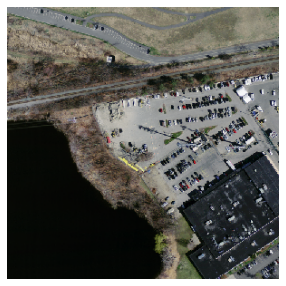

In [30]:
img_1 = path_images/'train/22678915_15_1.tiff'
img = PILImage.create(img_1)
img.show(figsize=(5, 5))

In [31]:
img.size


(300, 300)

In [32]:
test_name = "test"

In [33]:
def get_y_fn (x):
    return Path(str(x).replace("Images","Labels").replace(".tiff",".tif"))

In [34]:
codes = np.loadtxt(path/'codes.txt', dtype=str)

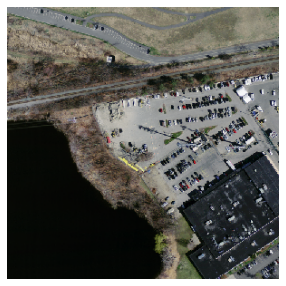

In [35]:
img_f = path_images/'train/22678915_15_1.tiff'
img = PILImage.create(img_f)
img.show(figsize=(5, 5))

In [36]:
img.size

(300, 300)

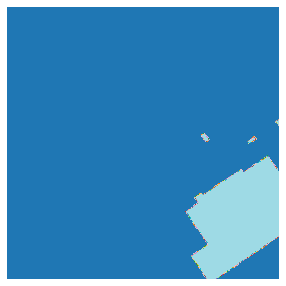

In [37]:
mask = PILMask.create(get_y_fn(img_f))
mask.show(figsize=(5, 5), alpha=1)

In [38]:
np.unique(mask)

array([ 0, 76], dtype=uint8)

In [39]:
def ParentSplitter(x):
    return Path(x).parent.name==test_name

In [44]:
from albumentations import (
    Compose,
    OneOf,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    HorizontalFlip,
    Rotate,
    Transpose,
    CLAHE,
    ShiftScaleRotate
)

class SegmentationAlbumentationsTransform(ItemTransform):
    split_idx = 0
    
    def __init__(self, aug): 
        self.aug = aug
        
    def encodes(self, x):
        img,mask = x
        aug = self.aug(image=np.array(img), mask=np.array(mask))
        return PILImage.create(aug["image"]), PILMask.create(aug["mask"])

In [45]:
transforms=Compose([HorizontalFlip(p=0.5),
                    Rotate(p=0.40,limit=10),GridDistortion()
                    ],p=1)

In [46]:
transformPipeline=SegmentationAlbumentationsTransform(transforms)

In [42]:
class TargetMaskConvertTransform(ItemTransform):
    def __init__(self): 
        pass
    def encodes(self, x):
        img,mask = x
        
        #Convert to array
        mask = np.array(mask)
        
        mask[mask!=76]=0
        # Change 76 for 1
        mask[mask==76]=1
        
        
        # Back to PILMask
        mask = PILMask.create(mask)
        return img, mask

In [59]:
trainDB = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=partial(get_image_files,folders=['train']),
                   get_y=get_y_fn,
                   splitter=RandomSplitter(valid_pct=0.2),
                   item_tfms=[Resize((300,300))],
                   batch_tfms=Normalize.from_stats(*imagenet_stats)
                  )

In [60]:
bs = 4
trainDLS = trainDB.dataloaders(path_images,bs=bs)

Definimos el modelo:

In [61]:
import torch
torch.cuda.empty_cache()

In [62]:
learn = get_segmentation_learner(dls=trainDLS,number_classes=2,segmentation_type='Semantic Segmentation',
                                 architecture_name='hrnet',backbone_name='hrnet_w30',
                                 metrics=[Dice(),JaccardCoeff()],pretrained=True).to_fp16()

/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/autocast_mode.py:118: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


In [63]:
aux=learn.model
aux=aux.cpu()

traced_cell=torch.jit.script(aux)
traced_cell.save("hrnet-dataset3-data-augmentation.pth")

In [64]:
learn.load('hrnet')

In [3]:
!unzip fotosprueba.zip

Archive:  fotosprueba.zip
   creating: fotosprueba/
  inflating: fotosprueba/foto1.jpg   
  inflating: fotosprueba/foto2.jpg   


In [55]:
fotos=get_image_files("fotosprueba")

In [66]:
p=learn.predict('fotosprueba/foto1.jpg')

/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:116: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [73]:
p

(TensorMask([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]), TensorImage([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]), TensorImage([[[0.7598, 0.7598, 0.7636,  ..., 0.9721, 0.9722, 0.9722],
          [0.7598, 0.7598, 0.7636,  ..., 0.9721, 0.9722, 0.9722],
          [0.7500, 0.7500, 0.7538,  ..., 0.9726, 0.9725, 0.9725],
          ...,
          [0.9418, 0.9418, 0.9363,  ..., 0.9547, 0.9548, 0.9548],
          [0.9426, 0.9426, 0.9366,  ..., 0.9536, 0.9537, 0.9537],
          [0.9426, 0.9426, 0.9366,  ..., 0.9536, 0.9537, 0.9537]],
 
         [[0.2402, 0.2402, 0.2364,  ..., 0.0279, 0.0278, 0.0278],
          [0.2402, 0.2402, 0.2364,  ..., 0.0279, 0.0278,

Aquí está el problema

In [85]:
p[0].shape

torch.Size([300, 300])

In [77]:
preds=p[2][0]

In [83]:
preds_arx = (preds).argmax(dim=0)

In [84]:
np.unique(preds_arx)

array([  6,  13,  14,  22,  25,  26,  29,  45,  46,  82,  85, 110, 113,
       114, 118, 121, 122, 125, 126, 129, 130, 133, 153, 154, 178, 182,
       185, 186, 189, 190, 193, 194, 197, 210, 213, 214, 217, 218, 221,
       222, 225, 226, 241, 242, 245, 246, 249, 250, 253, 254, 257, 258,
       262, 269, 286])

In [81]:
preds.shape

torch.Size([300, 300])

TypeError: ignored

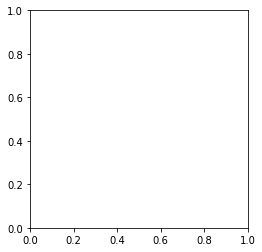

In [79]:

plt.imshow(preds_arx)